### __Importation des bibliothèques nécessaires__

In [10]:
from d2l import tensorflow as d2l
from d2l import mxnet as d2l
from d2l import torch as d2l
from mxnet import np, npx
import tensorflow as tf
import torch
import math
npx.set_np()

epoch 20, x1: -2.382563, x2: -0.158591


2022-12-21 08:11:50.507172: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


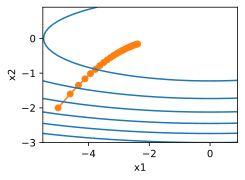

In [13]:
def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


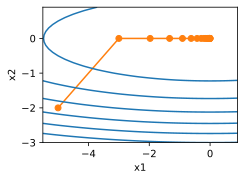

In [14]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

In [15]:
def init_adagrad_states(feature_dim):
    s_w = d2l.zeros((feature_dim, 1))
    s_b = d2l.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        s[:] += np.square(p.grad)
        p[:] -= hyperparams['lr'] * p.grad / np.sqrt(s + eps)

In [16]:
def init_adagrad_states(feature_dim):
    s_w = d2l.zeros((feature_dim, 1))
    s_b = d2l.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

In [17]:
def init_adagrad_states(feature_dim):
    s_w = tf.Variable(d2l.zeros((feature_dim, 1)))
    s_b = tf.Variable(d2l.zeros(1))
    return (s_w, s_b)

def adagrad(params, grads, states, hyperparams):
    eps = 1e-6
    for p, s, g in zip(params, states, grads):
        s[:].assign(s + tf.math.square(g))
        p[:].assign(p - hyperparams['lr'] * g / tf.math.sqrt(s + eps))

loss: 0.243, 0.683 sec/epoch


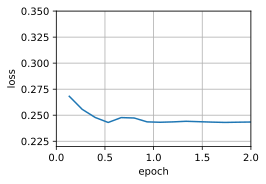

In [18]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim),
               {'lr': 0.1}, data_iter, feature_dim);

### __Conclusion__
* Adagrad diminue le taux d'apprentissage dynamiquement sur une base par coordonnée.
* Il utilise l'amplitude du gradient comme moyen d'ajuster la rapidité avec laquelle les progrès sont réalisés - les coordonnées avec de grands gradients sont compensées par un taux d'apprentissage plus faible.
* Le calcul de la dérivée seconde exacte est généralement impossible dans les problèmes d'apprentissage en profondeur en raison de contraintes de mémoire et de calcul. 
* Si le problème d'optimisation a une structure plutôt inégale, Adagrad peut aider à atténuer la distorsion.
* Adagrad est particulièrement efficace pour les fonctionnalités rares où le taux d'apprentissage doit diminuer plus lentement pour les termes peu fréquents.